
# Histogram of Oriented Gradients

- [参考](http://scikit-image.org/docs/0.11.x/auto_examples/plot_hog.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, color, exposure
import numpy as np
import io, urllib
import urllib.request
import cv2
import PIL

# 処理対象画像ファイルの URL　　　httpを含めること

fname = "http://onair-blog.jp/pepsicoara/upload/4e07ed996044e.jpeg"

#  jupyter の起動フォルダにアップロードしてそのファイル名を書いても OK
# fname = "kitty.jpg"

def url2img(url):
    # print(url)
    if url[:16] == "http://localhost":
        pic = url.rsplit('/',1)[1]
        f = open("pics/"+pic,'rb')
    elif url[:4] != "http":
        f = open(url,'rb')
        
    else:
        f = io.BytesIO(urllib.request.urlopen(url).read())
    img = PIL.Image.open(f)
    w,h = img.width, img.height
    w1, h1 = 48*int(w/48), 48*int(h/48)
    return img.resize((w1,h1))

src = url2img(fname)

In [2]:
gray = color.rgb2gray(np.asarray(src))  # skimage 形式のグレー画像に変換
# HOG 特徴の抽出   １ブロック　３ｘ３　　　１セル 16x16  
fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(3,3), visualize=True, block_norm='L2-Hys')

print("画像サイズ {} ブロック数　{} x {} ".format(src.size, src.size[0]/16, src.size[1]/16))
dx, dy = src.size[0] /16 -2,src.size[1]/16 -2
print("HOG特徴次元数 {} = 横ブロック数　{} x 縦ブロック数 {} x ブロック当たりのセル 9 × 方向数 9".format(fd.shape[0],dx,dy))
'''両端のセルはただしく正規化できないので、 縦横を１６で割った数よりそれぞれ２少ない'''

画像サイズ (336, 384) ブロック数　21.0 x 24.0 
HOG特徴次元数 33858 = 横ブロック数　19.0 x 縦ブロック数 22.0 x ブロック当たりのセル 9 × 方向数 9


'両端のセルはただしく正規化できないので、 縦横を１６で割った数よりそれぞれ２少ない'

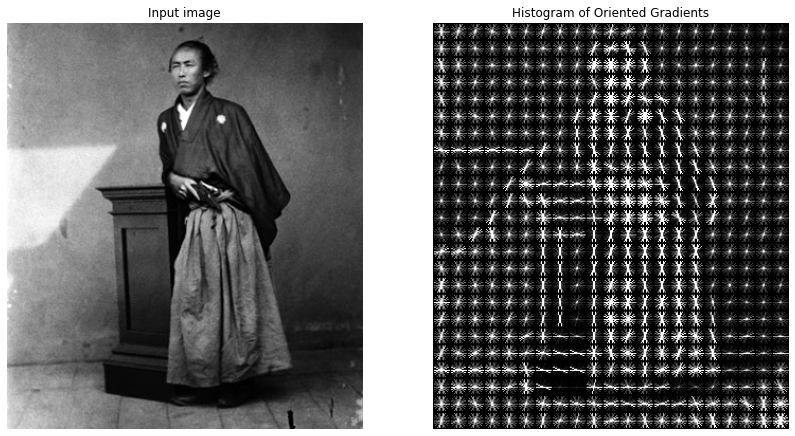

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 9))

ax1.axis('off')
ax1.imshow(ｓｒｃ, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.01))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

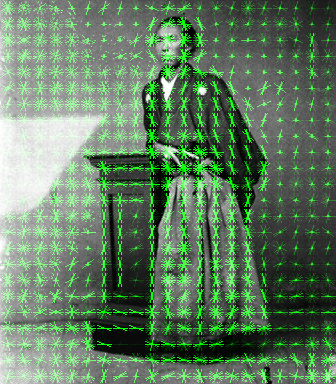

In [4]:
rimg= np.array(hog_image_rescaled*255 ,dtype=np.uint8) # 0-255 表現に変換
img = np.asarray(src).copy()
img[:,:,1] = np.bitwise_or(img[:,:,1],rimg)
mini = PIL.Image.fromarray(img)
mini.thumbnail((400,400),PIL.Image.ANTIALIAS)
mini

# HOG を用いた人物検出

HOG は明暗変化に関しては強靭である。近傍ブロック単位での正規化により、明暗変化に対してはロバストであるので、日差しや照明がパフォーマンスに影響することは少ない。

スケール不変でも回転不変でもないので、用途は対象のサイズや向きの振れ幅が小さい場合に限定される。例えば、店内の固定監視カメラなどでは画像に対する人物のサイズや向きが安定しているので向いている。

### 応用例

人物検出に適当なフレームサイズを定めて人物がフレームに入った画像とそうでない画像を多数用意し、学習により識別系を作成する。人物かそうでないかだけの識別であれば、比較的良好なパフォーマンスが得られそうである。
